In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/ab_di/Downloads/Regression/measurements.csv')
df['distance'] = df['distance'].str.replace(',', '.').astype(float)
df['consume'] = df['consume'].str.replace(',', '.').astype(float)
df['temp_inside'] = df['temp_inside'].str.replace(',', '.').astype(float)

In [4]:
df.shape

(388, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     object 
 11  refill gas     13 non-null     object 
dtypes: float64(3), int64(5), object(4)
memory usage: 36.5+ KB


In [6]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [7]:
df.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


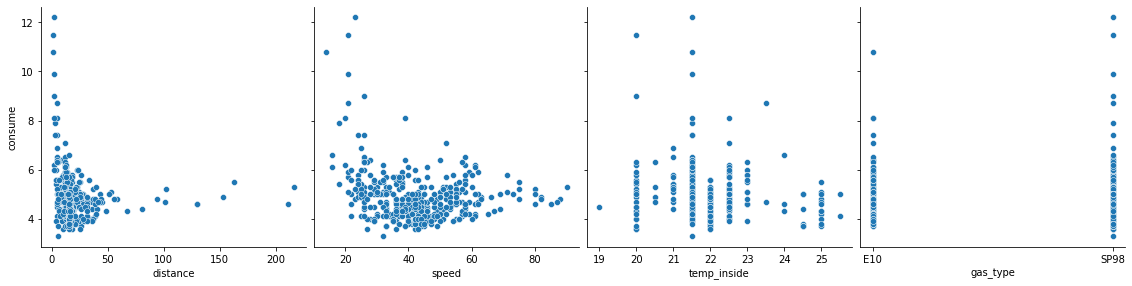

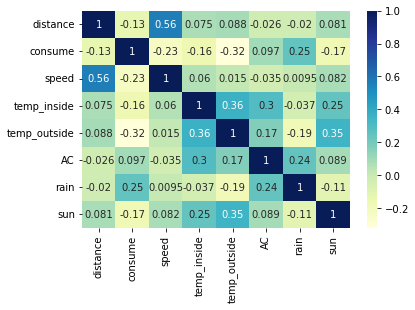

In [8]:
sns.pairplot(df, x_vars=['distance', 'speed', 'temp_inside', 'gas_type'],
             y_vars='consume', height=4, aspect=1, kind='scatter')
plt.show()

sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [49]:
dfSpeed30 = df.query('speed<30')
X = dfSpeed30['distance']
y = dfSpeed30['consume']

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [73]:
import statsmodels.api as sm


X_train_sm = sm.add_constant(X_train)

In [52]:
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const       7.116404
distance   -0.118281
dtype: float64

In [53]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                consume   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     24.24
Date:                Sat, 09 Apr 2022   Prob (F-statistic):           9.33e-06
Time:                        16:33:23   Log-Likelihood:                -90.645
No. Observations:                  53   AIC:                             185.3
Df Residuals:                      51   BIC:                             189.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1164      0.345     20.630      0.000       6.424       7.809
distance      -0.1183      0.024     -4.923      0.000      -0.167      -0.070
==============================================================================
Omnibus:                       36.167   Durbin-Watson:                   2.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.528
Skew:                           1.993   Prob(JB):                     8.09e-21
Kurtosis:                       8.099   Cond. No.                         26.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

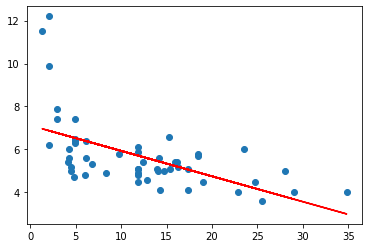

In [66]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.1164 + -0.1183 * X_train, 'r')
plt.show()

In [55]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

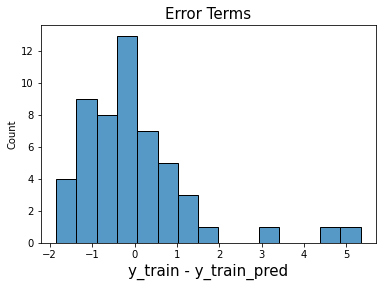

In [56]:
fig = plt.figure()
sns.histplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

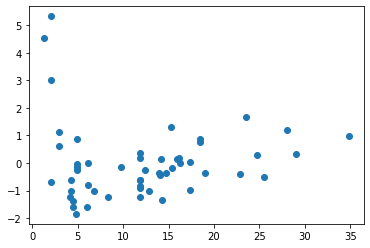

In [57]:
plt.scatter(X_train, res)
plt.show()

In [74]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

print(y_test_pred)

28     4.951871
289    6.241128
143    6.288441
165    6.394893
254    6.879843
206    6.832531
258    6.879843
147    6.915327
64     5.649726
47     5.223916
31     5.720694
324    4.502405
74     5.744350
48     5.720694
265    6.619626
115    6.536830
217    5.200260
151    5.945427
84     5.720694
112    6.513173
204    6.087364
103    6.536830
89     5.472305
dtype: float64


In [59]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.3280062340400993

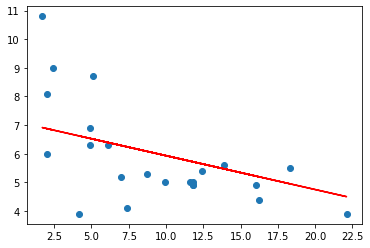

In [60]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [61]:
from sklearn.model_selection import train_test_split

X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [62]:
X_train_lm.shape
X_train_lm = X_train_lm.values.reshape(-1, 1)
X_test_lm = X_test_lm.values.reshape(-1, 1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(53, 1)
(23, 1)


In [63]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_lm, y_train_lm)


LinearRegression()

In [64]:
print("Intercept :", lm.intercept_)
print('Slope :', lm.coef_)

Intercept : 7.116404078956191
Slope : [-0.11828051]


In [71]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.3221570518038501
0.32800623404009943
